# Indian School of Business
## AMPBA - Term 
## Group - 13
### Marketing and Customer Analytics - Part 3: Paid Search Bid Optimization.

### Group 13 - Member Details

| PGID     | Name               |
|----------|-------------------|
| 12420072 | Sanjukta Ghosh    |
| 12420042 | Mili Kapdia       |
| 12420055 | Abhinav Paul      |
| 12420007 | Bhaskar Yerramilli|

#### Exploratory Data Analysis

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize, Bounds, NonlinearConstraint
import matplotlib.pyplot as plt

In [2]:
#Loading the click data csv files
data_kw1 = pd.read_csv("clicksdata.kw8322228.csv")
data_kw2 = pd.read_csv("clicksdata.kw8322392.csv")
data_kw3 = pd.read_csv("clicksdata.kw8322393.csv")
data_kw4 = pd.read_csv("clicksdata.kw8322445.csv")

In [3]:
keyword_files = {
    "kw8322228": "clicksdata.kw8322228.csv",
    "kw8322392": "clicksdata.kw8322392.csv",
    "kw8322393": "clicksdata.kw8322393.csv",
    "kw8322445": "clicksdata.kw8322445.csv"
}

In [4]:
#Previewing the data of kw8322228 file
data_kw1.info()
data_kw1.describe()
data_kw1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   bid.value   9 non-null      float64
 2   n.clicks    9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 348.0 bytes


,Unnamed: 0,bid.value,n.clicks
0,1,5.58,15
1,2,8.04,24
2,3,10.77,25
3,4,13.83,30
4,5,17.33,46
5,6,21.39,38
6,7,26.25,40
7,8,32.27,50
8,9,40.24,65


In [5]:
#Previewing the data of kw8322392 file
data_kw2.info()
data_kw2.describe()
data_kw2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   bid.value   9 non-null      float64
 2   n.clicks    9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 348.0 bytes


,Unnamed: 0,bid.value,n.clicks
0,1,1.44,30
1,2,2.07,45
2,3,2.78,60
3,4,3.57,75
4,5,4.47,66
5,6,5.52,83
6,7,6.77,98
7,8,8.33,106
8,9,10.38,131


In [6]:
#Previewing the data of kw8322393 file
data_kw3.info()
data_kw3.describe()
data_kw3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   bid.value   9 non-null      float64
 2   n.clicks    9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 348.0 bytes


,Unnamed: 0,bid.value,n.clicks
0,1,3.28,17
1,2,4.73,33
2,3,6.34,42
3,4,8.14,57
4,5,10.19,51
5,6,12.58,68
6,7,15.44,81
7,8,18.99,78
8,9,23.67,88


In [7]:
#Previewing the data of kw8322445 file
data_kw4.info()
data_kw4.describe()
data_kw4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   bid.value   9 non-null      float64
 2   n.clicks    9 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 348.0 bytes


,Unnamed: 0,bid.value,n.clicks
0,1,0.53,32
1,2,0.76,60
2,3,1.01,76
3,4,1.30,86
4,5,1.63,97
5,6,2.01,101
6,7,2.47,113
7,8,3.04,131
8,9,3.79,163


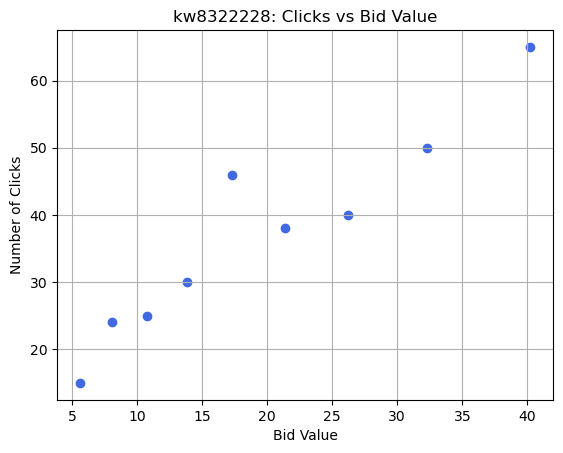

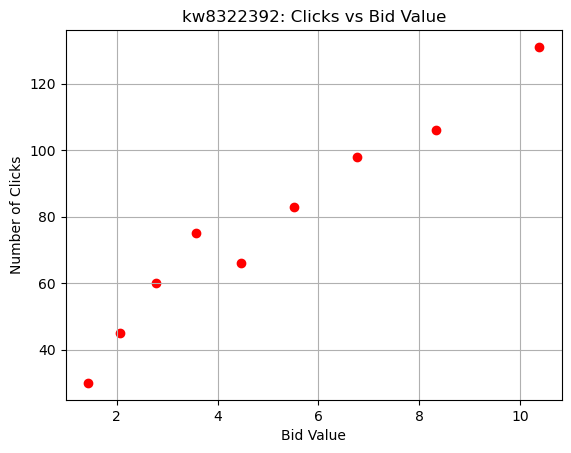

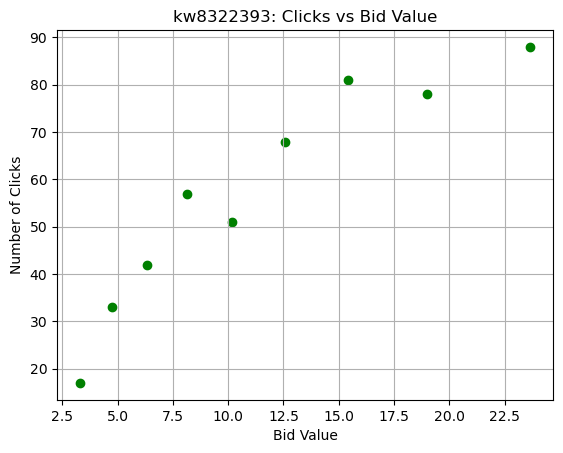

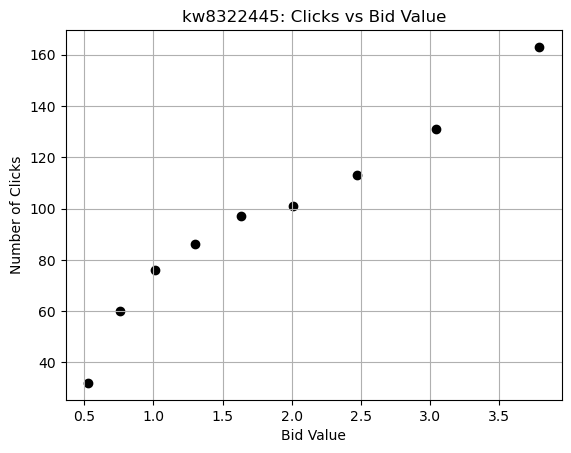

In [8]:
#Plotting the scatter plots for all the four files separately
plt.scatter(data_kw1['bid.value'], data_kw1['n.clicks'], color='royalblue')
plt.title(f"{list(keyword_files.keys())[0]}: Clicks vs Bid Value")
plt.xlabel("Bid Value")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.show()

plt.scatter(data_kw2['bid.value'], data_kw2['n.clicks'], color='red')
plt.title(f"{list(keyword_files.keys())[1]}: Clicks vs Bid Value")
plt.xlabel("Bid Value")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.show()

plt.scatter(data_kw3['bid.value'], data_kw3['n.clicks'], color='green')
plt.title(f"{list(keyword_files.keys())[2]}: Clicks vs Bid Value")
plt.xlabel("Bid Value")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.show()

plt.scatter(data_kw4['bid.value'], data_kw4['n.clicks'], color='black')
plt.title(f"{list(keyword_files.keys())[3]}: Clicks vs Bid Value")
plt.xlabel("Bid Value")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.show()

From the above graphs, we can confirm the Clicks and Bid values are positively correlated. Below, we are checking the correlation values too.

In [9]:
data_kw1.corr(numeric_only=True) #correlatiobn values for File kw8322228

,Unnamed: 0,bid.value,n.clicks
Unnamed: 0,1.000000,0.981268,0.938384
bid.value,0.981268,1.000000,0.943991
n.clicks,0.938384,0.943991,1.000000


In [10]:
data_kw2.corr(numeric_only=True) #correlatiobn values for File kw8322392

,Unnamed: 0,bid.value,n.clicks
Unnamed: 0,1.000000,0.981308,0.975797
bid.value,0.981308,1.000000,0.975970
n.clicks,0.975797,0.975970,1.000000


In [11]:
data_kw3.corr(numeric_only=True) #correlatiobn values for File kw8322393

,Unnamed: 0,bid.value,n.clicks
Unnamed: 0,1.000000,0.981268,0.973807
bid.value,0.981268,1.000000,0.934941
n.clicks,0.973807,0.934941,1.000000


In [12]:
data_kw4.corr(numeric_only=True) #correlatiobn values for File kw8322445

,Unnamed: 0,bid.value,n.clicks
Unnamed: 0,1.000000,0.980843,0.976784
bid.value,0.980843,1.000000,0.973035
n.clicks,0.976784,0.973035,1.000000


#### Part A: Simulating Clicks and Profit Functions

In [13]:
#Defining the model funciton
def click_model(bid, alpha, beta):
    return alpha * (1 - np.exp(-beta * bid))

We could see there total 4 different ways or Heuristics mentioned to select the intial values.

Why Not Heuristics 1,2 and 3, and Why we Chose Heuristic 4?

* Nonlinear regression models are sensitive to starting values. The first three heuristics are intuitive but less reliable.

* The first uses fixed starting values (alpha = 150, beta = 0.5), which ignores variations across keywords and can cause poor convergence. 

* The second depends on estimating the bid where clicks reach half their maximum, but this “b_half” point is often hard to determine accurately in noisy data. 

* The third assumes β as the reciprocal of the average bid, which oversimplifies the true nonlinear relationship.

* The fourth heuristic, which tests multiple random starting points and selects the one with the lowest residual sum of squares, is more robust. It reduces sensitivity to initial guesses and increases the likelihood of finding the global optimum. Hence, this randomized multi-start approach was chosen for estimating alpha and beta for all keywords.

In [14]:
#Defining the function to fit the model for keyword dataset
def fit_keyword(data, kw_name):
    bids = data['bid.value'].values #Extract bid values as numpy arrays
    clicks = data['n.clicks'].values #Extract click values as numpy arrays
    
    #Initializing best parameter values and best RSS
    best_alpha, best_beta = None, None
    best_rss = np.inf  #starting with infinity so any smaller value will replace it
    
    #Trying the multiple random starting values to avoid local minima
    for i in range(50):
        #Random initial guesses for alpha and beta (within reasonable bounds)
        alpha0 = np.random.uniform(50, 200)
        beta0 = np.random.uniform(0.01, 1.0)
        
        try:
            #Fiting the nonlinear model using curve_fit with bounds ≥ 0
            popt, pcov = curve_fit(
                click_model, bids, clicks,
                p0=[alpha0, beta0],
                bounds=(0, np.inf)
            )
            
            #Calculating residuals and RSS(residual sum of squares)
            residuals = clicks - click_model(bids, *popt)
            rss = np.sum(residuals**2)
            
            #Keeping the parameters with the lowest RSS
            if rss < best_rss:
                best_rss = rss
                best_alpha, best_beta = popt
        
        #Skip any failed fits
        except:
            continue
    
    print(f"{kw_name}: alpha={best_alpha:.2f}, beta={best_beta:.4f}, RSS={best_rss:.2f}") #Printing the final parameter estimates for this keyword
    
    #Return the results
    return best_alpha, best_beta, best_rss

In [15]:
#run for the keyword file kw8322228
fit_keyword(data_kw1, "kw8322228")

kw8322228: alpha=74.09, beta=0.0394, RSS=229.81


(np.float64(74.09101957010375),
 np.float64(0.03944888063790977),
 np.float64(229.81475086717015))

In [16]:
#running for second keywords file
fit_keyword(data_kw2, "kw8322392")

kw8322392: alpha=156.44, beta=0.1501, RSS=383.57


(np.float64(156.4398739001483),
 np.float64(0.15008271876261187),
 np.float64(383.5730036373129))

In [17]:
#running for third keywords file
fit_keyword(data_kw3, "kw8322393")

kw8322393: alpha=104.80, beta=0.0797, RSS=216.31


(np.float64(104.7994278869743),
 np.float64(0.0797163969730434),
 np.float64(216.3087537213227))

In [18]:
#running for fourth keywords file
fit_keyword(data_kw4, "kw8322445")

kw8322445: alpha=188.11, beta=0.4323, RSS=565.69


(np.float64(188.11180249093388),
 np.float64(0.4322897600877195),
 np.float64(565.6905802052721))

In [19]:
fit_results = {}

for kw, file_path in keyword_files.items():
    data = pd.read_csv(file_path)
    alpha, beta, rss = fit_keyword(data, kw)
    fit_results[kw] = {'alpha': alpha, 'beta': beta, 'rss': rss}

kw8322228: alpha=74.09, beta=0.0394, RSS=229.81
kw8322392: alpha=156.44, beta=0.1501, RSS=383.57
kw8322393: alpha=104.80, beta=0.0797, RSS=216.31
kw8322445: alpha=188.11, beta=0.4323, RSS=565.69


In [20]:
fit_results

{'kw8322228': {'alpha': np.float64(74.09103530191165),
  'beta': np.float64(0.03944886602439313),
  'rss': np.float64(229.8147508670063)},
 'kw8322392': {'alpha': np.float64(156.43993370589877),
  'beta': np.float64(0.15008261929431208),
  'rss': np.float64(383.5730036371549)},
 'kw8322393': {'alpha': np.float64(104.79941482362734),
  'beta': np.float64(0.07971641611992444),
  'rss': np.float64(216.3087537213148)},
 'kw8322445': {'alpha': np.float64(188.11180226844445),
  'beta': np.float64(0.4322897611074274),
  'rss': np.float64(565.690580205277)}}

The parameter alpha represents the maximum potential number of clicks that can be achieved for a keyword as bid value increases, in other words, the saturation point of the click curve. The parameter beta reflects how quickly clicks approach that saturation level as bids rise, a higher betaindicates faster responsiveness to bid changes. Hence, keywords like kw8322445 with a high beta (0.43) reach their saturation faster, while kw8322228 with a lower beta (0.039) shows a slower click growth with increasing bids.

#### Part B: Optimal Bids (Unconstrained)

In [21]:
#Loading LTV and conversion rate from Excel
df_ltv = pd.read_excel("hw-kw-ltv-conv.rate-data.xlsx")
kw_ltv_conv = df_ltv.set_index('keyword')[['ltv', 'conv.rate']].rename(columns={'conv.rate': 'conv_rate'}).to_dict('index')

In [22]:
kw_ltv_conv

{'kw8322228': {'ltv': 354, 'conv_rate': 0.3},
 'kw8322392': {'ltv': 181, 'conv_rate': 0.32},
 'kw8322393': {'ltv': 283, 'conv_rate': 0.3},
 'kw8322445': {'ltv': 107, 'conv_rate': 0.3}}

In [23]:
#Profit model
def profit_for_bid(b, alpha, beta, conv_rate, ltv):
    b = float(b)
    clicks = click_model(b, alpha, beta)
    revenue = clicks * conv_rate * ltv
    expenditure = clicks * b
    return revenue - expenditure

In [24]:
#Expenditure model
def expenditure_for_bid(b, alpha, beta):
    clicks = click_model(b, alpha, beta)
    return clicks * b

In [25]:
#Optimization Routine
def find_optimal_bid_for_keyword(alpha, beta, conv_rate, ltv,
                                 grid_max=200.0, grid_pts=2001):
    # Grid search
    grid = np.linspace(0.0, grid_max, grid_pts) #Grid search on [0, grid_max] for a good starting bid.
    profits_grid = np.array([profit_for_bid(b, alpha, beta, conv_rate, ltv) for b in grid])
    idx_best = np.argmax(profits_grid)
    grid_best_bid = float(grid[idx_best])
    grid_best_profit = float(profits_grid[idx_best])
    
    # Local optimization
    def obj(x):
        return -profit_for_bid(x[0], alpha, beta, conv_rate, ltv)
    
    x0 = np.array([grid_best_bid if grid_best_bid > 0 else 1.0])
    bounds = Bounds([0.0], [np.inf])
    res = minimize(obj, x0=x0, method='L-BFGS-B', bounds=bounds, options={'maxiter': 1000})
    
    opt_bid = float(res.x[0]) if res.success else grid_best_bid
    opt_profit = profit_for_bid(opt_bid, alpha, beta, conv_rate, ltv)
    opt_expenditure = expenditure_for_bid(opt_bid, alpha, beta)
    
    return {
        'opt_bid': opt_bid,
        'opt_profit': opt_profit,
        'opt_expenditure': opt_expenditure,
        'grid_best_bid': grid_best_bid,
        'grid_best_profit': grid_best_profit,
        'opt_success': bool(res.success)
    }

In [26]:
#Runnig Optimization for All Keywords
results_opt = {}
for kw, params in fit_results.items():
    alpha = params['alpha']
    beta = params['beta']
    ltv = kw_ltv_conv[kw]['ltv']
    conv_rate = kw_ltv_conv[kw]['conv_rate']
    res_kw = find_optimal_bid_for_keyword(alpha, beta, conv_rate, ltv)
    results_opt[kw] = res_kw

In [27]:
results_opt

{'kw8322228': {'opt_bid': 34.12767244351,
  'opt_profit': np.float64(3950.4585497486796),
  'opt_expenditure': np.float64(1870.6202499401054),
  'grid_best_bid': 34.1,
  'grid_best_profit': 3950.4571388830714,
  'opt_success': True},
 'kw8322392': {'opt_bid': 13.563459138154665,
  'opt_profit': np.float64(6032.9045876263945),
  'opt_expenditure': np.float64(1844.7573518755273),
  'grid_best_bid': 13.600000000000001,
  'grid_best_profit': 6032.886900735837,
  'opt_success': True},
 'kw8322393': {'opt_bid': 22.43389338298707,
  'opt_profit': np.float64(5451.616076634733),
  'opt_expenditure': np.float64(1957.8773266283995),
  'grid_best_bid': 22.400000000000002,
  'grid_best_profit': 5451.610470677574,
  'opt_success': True},
 'kw8322445': {'opt_bid': 5.81697319467881,
  'opt_profit': np.float64(4544.196601846606),
  'opt_expenditure': np.float64(1005.7239609457994),
  'grid_best_bid': 5.800000000000001,
  'grid_best_profit': 4544.183907837755,
  'opt_success': True}}

In [28]:
#Results
df_opt = pd.DataFrame.from_dict(results_opt, orient='index')
df_opt = df_opt[['opt_bid','opt_profit','opt_expenditure','grid_best_bid','grid_best_profit','opt_success']]
df_opt.rename(columns={
    'opt_bid': 'optimal_bid',
    'opt_profit': 'profit_at_optimal_bid',
    'opt_expenditure': 'expenditure_at_optimal_bid'
}, inplace=True)
display(df_opt.round(4))

,optimal_bid,profit_at_optimal_bid,expenditure_at_optimal_bid,grid_best_bid,grid_best_profit,opt_success
kw8322228,34.1277,3950.4585,1870.6202,34.1,3950.4571,True
kw8322392,13.5635,6032.9046,1844.7574,13.6,6032.8869,True
kw8322393,22.4339,5451.6161,1957.8773,22.4,5451.6105,True
kw8322445,5.8170,4544.1966,1005.7240,5.8,4544.1839,True


Among all, kw8322392 achieved the highest total profit dollars 6,032.9 at a moderate bid level, suggesting that it responds well to increases in bid and likely has a strong conversion potential.
kw8322445, despite having the lowest bid (dollars 5.8), delivered a profit of dollars 4,544.2 with the highest efficiency, earning approximately $4.5 for every 1 dollar spent. This makes it the most cost-effective keyword.

In contrast, kw8322228 required the highest bid ($34.1) but generated the lowest profit, implying diminishing returns at higher bid levels. kw8322393 showed balanced performance with a steady profit at a moderate bid.

From a business perspective, these findings highlight that higher bids do not necessarily translate into higher profits. An optimal bidding strategy should balance scale and efficiency, allocating more budget to keywords such as kw8322392 and kw8322445 that deliver strong returns, while reevaluating kw8322228 for potential creative or targeting improvements rather than further bid increases.

Overall, the analysis reinforces the importance of data-driven bid optimization in maximizing profitability within a fixed advertising budget.

#### Part C: Constrained Optimization ($3000 Budget)

In [29]:
keywords = list(keyword_files.keys())
n = len(keywords)

In [30]:
keywords, n

(['kw8322228', 'kw8322392', 'kw8322393', 'kw8322445'], 4)

In [31]:
budget = 3000.0 #constraint

In [32]:
alphas = np.array([fit_results[k]['alpha'] for k in keywords], dtype=float)
betas  = np.array([fit_results[k]['beta']  for k in keywords], dtype=float)
ltvs   = np.array([kw_ltv_conv[k]['ltv'] for k in keywords], dtype=float)
conv_rates = np.array([kw_ltv_conv[k]['conv_rate'] for k in keywords], dtype=float)

In [33]:
alphas

array([ 74.0910353 , 156.43993371, 104.79941482, 188.11180227])

In [34]:
betas

array([0.03944887, 0.15008262, 0.07971642, 0.43228976])

In [35]:
ltvs

array([354., 181., 283., 107.])

In [36]:
conv_rates

array([0.3 , 0.32, 0.3 , 0.3 ])

The clicks_model, total expenditure and total profit defined in prev two parts will only acept scalar inputs. 

For this part c, we need to give the inputs as vectors as we need to optimize all 4 keywords simultaneously under a shared budget constraint. Hence creating the same kind of models that accept the vectors.

In [37]:
#Model vectorized functions
def clicks_vector(b):
    b = np.asarray(b, dtype=float)
    return alphas * (1.0 - np.exp(-betas * b))

def total_expenditure(b):
    clicks = clicks_vector(b)
    return np.sum(clicks * b)

def total_profit(b):
    clicks = clicks_vector(b)
    revenues = clicks * conv_rates * ltvs
    expenditures = clicks * b
    return np.sum(revenues - expenditures)

In [38]:
#Objective to minimize (negative total profit)
def obj_to_minimize(b_vec):
    return -total_profit(b_vec) #Minimizing of negative profit is equivalent to maximizing profit.

In [39]:
#Bounds
bounds = Bounds([0.0]*n, [np.inf]*n)  #Here we are ensuring all bids are >= 0

In [40]:
nl_cons = NonlinearConstraint(total_expenditure, -np.inf, budget) #Nonlinear constraint: total_expenditure(b) <= budget

In [41]:
#For starting point or intial bid, we are using already computed optimal bids from PartB
if 'results_opt' in globals():
    try:
        x0 = np.array([results_opt[k]['opt_bid'] for k in keywords], dtype=float)
    except Exception:
        x0 = np.full(n, 1.0)
else:
    x0 = np.full(n, 1.0)

#If x0 ecxeeds budget, we are scaling it down proportionally to make it feasible
if total_expenditure(x0) > budget:
    scale = budget / total_expenditure(x0)
    x0 = x0 * scale * 0.95   #using 95% to be safely interior feasible

In [42]:
#solving with trust-constr
res = minimize(
    obj_to_minimize,
    x0=x0,
    method='trust-constr',
    bounds=bounds,
    constraints=[nl_cons],
    options={'maxiter': 2000, 'verbose': 1}
)

`xtol` termination condition is satisfied.
Number of iterations: 96, function evaluations: 580, CG iterations: 199, optimality: 3.80e-05, constraint violation: 0.00e+00, execution time: 0.31 s.


C:\Users\Acer\anaconda3\Lib\site-packages\scipy\optimize\_differentiable_functions.py:317: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
C:\Users\Acer\anaconda3\Lib\site-packages\scipy\optimize\_differentiable_functions.py:552: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


In [43]:
#Results
opt_bids = np.maximum(res.x, 0.0)  #ensure nonnegativity numerically
clicks_opt = clicks_vector(opt_bids)
expenditures = clicks_opt * opt_bids
profits = clicks_opt * (conv_rates * ltvs - opt_bids)

summary = pd.DataFrame({
    'keyword': keywords,
    'opt_bid': opt_bids,
    'clicks_at_opt': clicks_opt,
    'expenditure': expenditures,
    'profit': profits
})

In [44]:
total_profit_opt = summary['profit'].sum()
total_expenditure_opt = summary['expenditure'].sum()

In [45]:
print("Optimization success:", res.success)
print(f"Total profit (constrained) = {total_profit_opt:,.2f}")
print(f"Total expenditure (constrained) = {total_expenditure_opt:,.2f}")
print("Per-keyword results:")
display(summary[['keyword','opt_bid','clicks_at_opt','expenditure','profit']].style.format({"opt_bid":"{:.4f}","clicks_at_opt":"{:.2f}","expenditure":"{:.2f}","profit":"{:.2f}"}))

Optimization success: True
Total profit (constrained) = 17,925.84
Total expenditure (constrained) = 3,000.00
Per-keyword results:


,keyword,opt_bid,clicks_at_opt,expenditure,profit
0,kw8322228,17.9243,37.56,673.21,3315.51
1,kw8322392,8.1184,110.18,894.51,5487.23
2,kw8322393,12.8283,67.11,860.88,4836.61
3,kw8322445,3.7757,151.34,571.40,4286.49


The optimizer distributes the $3000 budget strategically, not evenly - it spends more on keywords with the best profit-to-cost ratio.

Keywords kw8322392 and kw8322393 dominate total profit

kw8322228 receives a smaller share of clicks but higher bid, reflecting its higher conversion rate or lifetime value.

The constraint forces each keyword to operate at slightly lower bids than their unconstrained optima from Part B, keeping total spend within budget.

#### Part D : Relationship between LTV, alpha, beta, and Optimal Bid

LTV : alpha

* As customer lifetime value increases, the maximum potential clicks  also increase.

* high-LTV keywords attract a broader, more interested audience, so the ceiling on clicks is higher.

LTV : beta

* As LTV increases, responsiveness of clicks to bid also increases.

* small increases in bid produce faster increases in clicks.

* competitive, high-value customer segments respond more sharply to bid changes.

LTV : Optimal Bid 

* higher-LTV keywords have lower optimal bids.

* Because even with smaller bids, these high-LTV keywords generate sufficient clicks and profit due to:

     * Higher conversion likelihoods,

     * Larger lifetime revenue per customer,

     * And a faster saturation of clicks (since beta is high).

These are generic, non-branded keywords (e.g., “best credit card,” “cheap flights,” etc.), so they attract different consumer segments:

* Some segments represent high-value, more committed customers who are likely to convert even with minimal ad exposure.

* Others are low-value, more price-sensitive browsers, who require higher bids (and hence higher ad visibility) to convert.


High-LTV keywords correspond to segments that are more intent-driven, they convert easily (beta high) and reach saturation quickly, requiring smaller bids.

Low-LTV keywords correspond to casual or exploratory consumers, you must bid higher (to stay visible longer) to attract meaningful clicks.